In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Ironhack\WEEK 5\LABS\LAB- EDA  Univariate Analysis\EXCEL LAB\amz_uk_price_prediction_dataset.csv')

In [29]:
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [35]:
df.shape


(2443651, 9)

In [39]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [41]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [ ]:
#### Part 1: Understanding Product Categories

#**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?


In [47]:
category_unique_values = df['category'].value_counts()
print(category_unique_values)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [51]:
#how do they compare in terms of listing frequency?

frequency_category_values = df['category'].value_counts(normalize=True)
frequency_category_values

#1. **Frequency Tables**:

 #   - Generate a frequency table for the product `category`.
 #   - Which are the top 5 most listed product categories?


#resultados: 34% Sport/ Beauty 

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [ ]:
# Sports & Outdoors: (0.342219 \times 100 = 34.22%)
# Beauty: (0.007903 \times 100 = 0.79%)
# Handmade Clothing, Shoes & Accessories: (0.007869 \times 100 = 0.79%)
# Bath & Body: (0.007813 \times 100 = 0.78%)
# Birthday Gifts: (0.007766 \times 100 = 0.78%)

In [ ]:
#2. **Visualizations**:
#    - Display the distribution of products across different categories using a bar chart:
# *If you face problems understanding the chart, do it for a subset of top categories.*
#    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13692\3472468491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_category_values.index, y=frequency_category_values.values, palette="Set3");


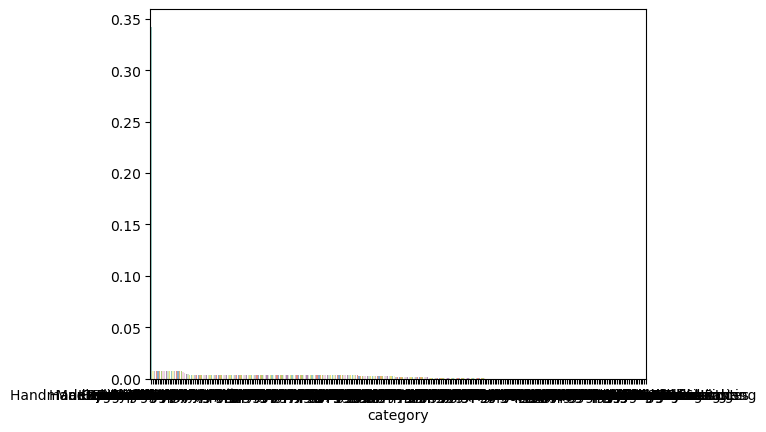

In [56]:
sns.barplot(x=frequency_category_values.index, y=frequency_category_values.values, palette="Set3");
plt.show()

In [58]:
# Seleccionar las cinco principales categorías
top5_categories = frequency_category_values.nlargest(5)
top5_categories

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13692\2060071823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_categories.index, y=top5_categories.values, palette="Set3");


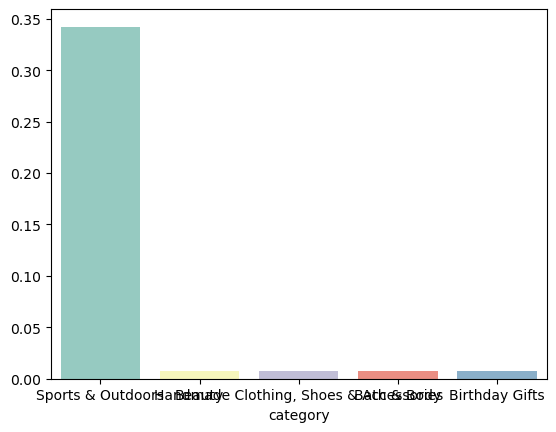

In [62]:
sns.barplot(x=top5_categories.index, y=top5_categories.values, palette="Set3");
plt.show()

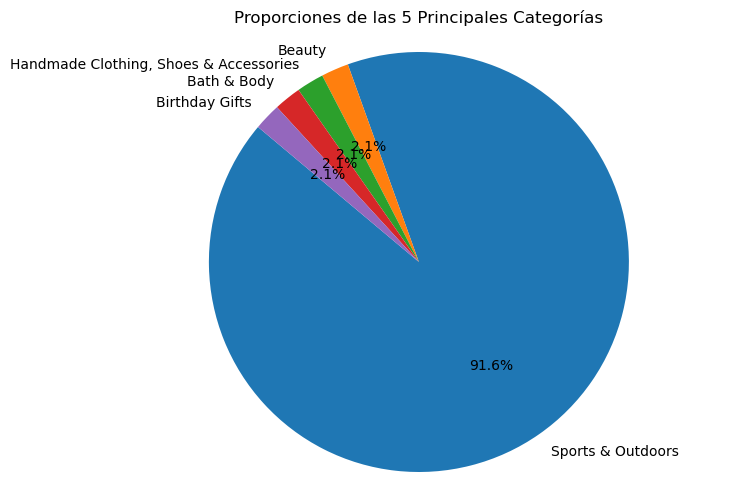

In [60]:

# Graficar gráfico de pastel

plt.figure(figsize=(8, 6))
plt.pie(top5_categories, labels=top5_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporciones de las 5 Principales Categorías')
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto
plt.show()

In [ ]:
### Part 2: Delving into Product Pricing

# **Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# 1. **Measures of Centrality**:
#  - Calculate the mean, median, and mode for the `price` of products.
#   - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [64]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [72]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price']. mode()

mean_price, median_price, mode_price

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [ ]:
# 2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
#    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [78]:
variance_price = df['price'].var() 
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
# Basado en los valores y términos que has proporcionado, 
# parece que estás analizando las estadísticas de un conjunto de datos relacionado con precios (`price`). 
#Vamos a interpretar cada una de las métricas:

### Estatísticas para Precios:

#1. **Varianza (variance_price)**: `119445.48532256528`
   #- La varianza mide la dispersión de los datos en relación con la media. 
    #Un valor tan alto sugiere que hay una gran variabilidad en los precios. Es probable que haya precios muy diferentes entre sí.

#2. **Desviación Estándar (std_dev_price)**: `345.60886175352226`
   #- La desviación estándar es la raíz cuadrada de la varianza. 
 #Nos proporciona una medida de la cantidad típica en la que los precios difieren de la media. Un valor de 345.61 es bastante grande, lo que confirma que hay una variabilidad considerable.

#3. **Precio Mínimo (min_price)**: `0.0`
   #- Este es el menor precio registrado en tu conjunto de datos. Un valor mínimo de 0.0 podría implicar productos gratuitos o problemas con el ingreso de datos si no se espera que existan precios cero.

#4. **Precio Máximo (max_price)**: `100000.0`
  # - Este es el mayor precio registrado. El hecho de que sea tan alto comparado con el precio mínimo sugiere que hay productos o servicios muy costosos en el conjunto de datos.

#5. **Rango (range_price)**: `100000.0`
  # - Calculado como la diferencia entre el precio máximo y el mínimo (`max_price - min_price`), el rango muestra el intervalo total en el que se distribuyen los precios.

#6. **Cuantiles (quantiles_price)**:
  # - **0.25 (Primer Cuartil)**: `9.99`
  # - **0.50 (Mediana/Segundo Cuartil)**: `19.09`
  # - **0.75 (Tercer Cuartil)**: `45.99`
     # - Estos valores dividen el conjunto de datos en cuatro partes iguales. 
     #El 25% de los datos está por debajo de 9.99, el 50% está por debajo de 19.09, y el 75% está por debajo de 45.99. 
     #Los cuantiles son útiles para entender la distribución de los datos y pueden sugerir que la mayoría de los productos son más económicos, con algunos productos caros que elevan el promedio.

### Interpretación General

#- **Varianza y Desviación Estándar Altas**: Sugieren una gran dispersión en los precios; posiblemente algunos precios extremos.
#- **Rango Extenso**: Indica una diversidad significativa entre los productos más baratos y los más caros.
#- **Cuantiles**: La mayoría de los precios están por debajo de 45.99, lo que sugiere que los productos caros son menos comunes.



In [ ]:
# 3. **Visualizations**:
#   - Is there a specific price range where most products fall? 
 #Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, 
#think why this is, and explain how it could be solved.*.
#    - Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing. 


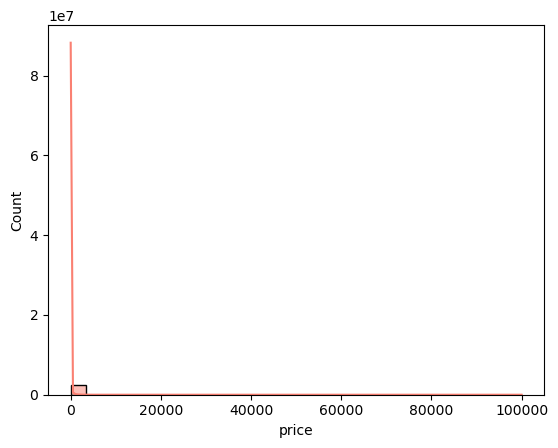

In [80]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")
plt.show()

In [ ]:
### Part 3: Unpacking Product Ratings

# **Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# 1. **Measures of Centrality**:
  #  - Calculate the mean, median, and mode for the `rating` of products.
#    - How do customers generally rate products? Is there a common trend?


In [84]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [88]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars']. mode()

mean_stars, median_stars, mode_stars

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

In [ ]:
#Media (mean): 2.152836472966065

#Interpretación: La media indica el promedio de las calificaciones de los productos. Una calificación promedio de algo más de 2 sugiere que, en general, los clientes están dando una calificación por debajo de la mitad del valor máximo posible (asumiendo un rango común de calificación de 0 a 5 estrellas), lo que podría indicar una satisfacción moderada o problemas en algunos productos.


In [ ]:
#Mediana (median): 0.0

#Interpretación: La mediana es el valor que divide el conjunto de calificaciones en dos partes iguales. Aquí, una mediana de 0 indica que más del 50% de los productos tienen calificaciones de 0. Esto podría indicar que algunos productos no han sido calificados en absoluto o han recibido reseñas muy deficientes.

In [ ]:
#Moda (mode): 0.0

#Interpretación: La moda representa la calificación más frecuente. El hecho de que la moda sea 0 refuerza la idea de que la calificación de 0 es la más común entre los productos. Esto es consistente con la mediana, sugiriendo que existe una gran cantidad de productos que no han recibido calificaciones positivas o están no evaluados.

In [ ]:
# Para investigar más a fondo el comportamiento de las calificaciones de productos, 
#especialmente fijando el foco en los productos que no están calificados o tienen calificaciones bajas, 
#podemos realizar algunos análisis adicionales y visualizaciones.

In [94]:
#CALCULAR EL TOTAL DE PRODUCTOS NO CALIFICADOS PARA ENTENDER MEAN, MEDIAN, MODE
# Calcular el número total de productos
total_productos = len(df)

# Calcular el número de productos no calificados
productos_no_calificados = df[df['stars'] == 0].shape[0]

# Calcular el porcentaje de productos no calificados
porcentaje_no_calificados = (productos_no_calificados / total_productos) * 100

print(f"Porcentaje de productos no calificados: {porcentaje_no_calificados:.2f}%")

Porcentaje de productos no calificados: 50.16%


In [ ]:
# 2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, and interquartile range for product `rating`.
#    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [92]:
variance_stars = df['stars'].var() 
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [ ]:
#3. **Shape of the Distribution**:
#    - Calculate the skewness and kurtosis for the `rating` column. 
#   - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [98]:
skewness_stars = df['stars'].skew()
skewness_stars

0.08120735761080985

In [ ]:
##La **asimetría** (skewness) es una medida estadística que describe el grado de distorsión o asimetría de una distribución de datos con respecto a una distribución normal. La asimetría cuantifica cuán sesgada está una distribución hacia la izquierda o hacia la derecha.

### Interpretación del Valor de Asimetría

##Para el valor que has proporcionado, `skewness_stars = 0.08120735761080985`, aquí está la interpretación:

#- **Cerca de Cero**: Un valor de asimetría cercano a cero, como el que tienes (0.081), indica que la distribución de las calificaciones (`stars`) es aproximadamente simétrica. Esto sugiere que no hay una desviación significativa hacia valores más altos o más bajos.
  
#- **Positivo**: Un valor de asimetría positivo, aunque cercano a cero, indica una ligera tendencia hacia valores más altos dentro de la distribución. Quiere decir que hay una pequeña inclinación a tener calificaciones más altas.


### Contexto y Consideración

#- **Simetría Ideal**: Una asimetría de exactamente cero sería una distribución perfectamente simétrica, como una distribución normal.

#- **Comparación con la Mediana y la Media**: Para comprobar cómo se comporta la asimetría en la práctica, puedes considerar cómo la media y la mediana se relacionan:
 # - Si la media es ligeramente superior a la mediana, esto puede confirmar el leve valor positivo de asimetría.

#- **Validez del Resultado**: Incluso cuando la asimetría es cercana a cero, siempre es bueno correlacionar este resultado con histogramas o gráficos de densidad de calificaciones para confirmar visualmente estos indicadores numéricos.

#Este análisis sugiere que a pesar de algunas variaciones, 
    #las calificaciones están distribuidas de manera bastante uniforme alrededor de una media central. 
     

In [100]:
kurtosis_stars = df['stars'].kurtosis()
kurtosis_stars

-1.9260061280432985

In [ ]:
#4. **Visualizations**:
 #   - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


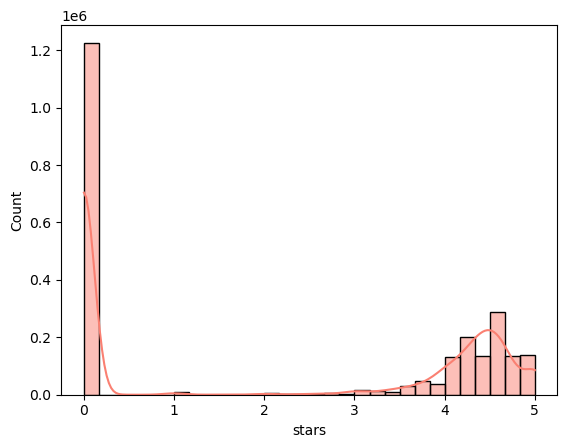

In [102]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")
plt.show()

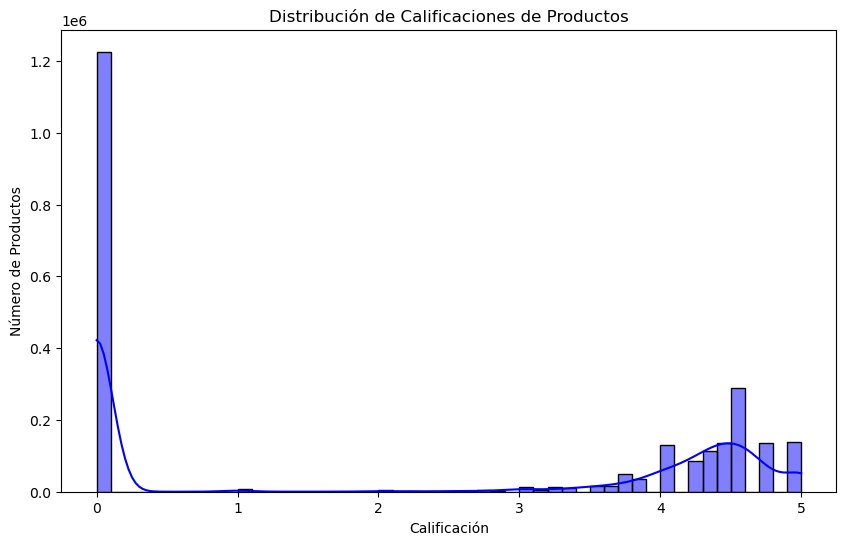

In [104]:
#Otro codigo para histograma:

# Supongamos que 'df' es tu DataFrame y 'stars' es tu columna de calificación
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=50, kde=True, color='blue')

# Configuración de etiquetas y título del gráfico
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Número de Productos')
plt.show()

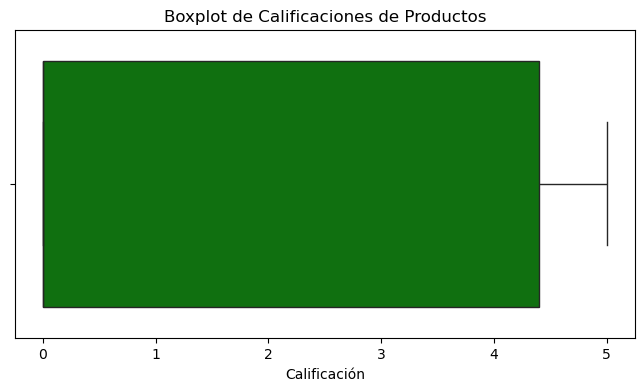

In [106]:
#Un gráfico de caja (boxplot) te permite ver la mediana, cuartiles y detectar posibles valores atípicos.

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['stars'], color='green')

# Configuración del título y etiquetas
plt.title('Boxplot de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.show()